In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

#plt.style.use("ultrasurfaces_plotstyle.mplstyle")

from toy_mc import generator
from importlib import reload

In [2]:
delta_msq_31 = 2.515e-3
sinsq_theta_23 = 0.565
# convert this to sin**2(2 \theta)
theta_23 = np.arcsin(np.sqrt(sinsq_theta_23))
sinsq_2theta_23 = np.sin(2 * theta_23)**2
default_pars = generator.OscPars(delta_msq_31, sinsq_2theta_23)

default_response = generator.Response(1., 0.05)

bin_edges = np.logspace(1., 2., 26)

In [3]:
reload(generator)

<module 'toy_mc.generator' from '/Users/trettin/Documents/ultrasurfaces/toy_mc/generator.py'>

In [4]:
gen = generator.Generator(int(1e5), default_response, default_pars)
h0 = gen.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [5]:
gen.detector_response

Response(mu=1.0, sigma=0.05)

In [6]:
h0.hist_unc

array([34.23677811, 42.13328073, 47.18529237, 47.34169062, 42.38404775,
       35.02243502, 27.04827081, 18.93463071, 12.78249099,  7.99674273,
        6.16437829,  7.00959242,  9.25194024, 12.23818217, 14.96052308,
       18.04377172, 20.76493268, 23.60023021, 24.55630499, 27.31751442,
       28.04885297, 29.10839798, 29.24230985, 28.69309373, 28.83835312])

In [7]:
h0.hist

array([1569.13043433, 2115.40572856, 2495.55888032, 2553.64596552,
       2226.70133493, 1775.063787  , 1285.82623571,  822.19937904,
        493.88926465,  293.53375762,  238.01451821,  280.50455775,
        387.15922895,  531.12209925,  682.02449989,  828.63342304,
        966.3818732 , 1089.62395316, 1062.25373671, 1204.15760817,
       1180.60259311, 1190.468666  , 1143.9332755 , 1052.49367052,
       1023.59848693])

In [8]:
from toy_mc.histogram import plot_histogram

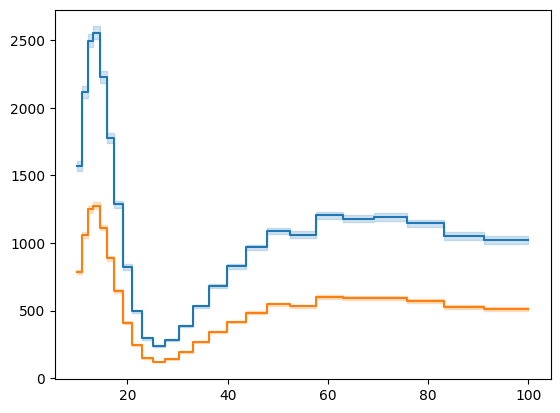

In [9]:
fig, ax = plt.subplots()
plot_histogram(h0, ax=ax)
plot_histogram(h0 / 2, ax=ax)

In [10]:
gen.events

,true_energy,true_cos(zen),weights_pre_detector,reco_energy,weights
0,4.472318,-1.0,0.894749,4.204319,0.894749
1,12.123394,-1.0,0.956377,11.012076,0.956377
2,8.168107,-1.0,0.084578,7.948751,0.084578
3,16.215172,-1.0,0.654954,16.568242,0.654954
4,8.324575,-1.0,0.045672,8.628784,0.045672
...,...,...,...,...,...
99995,15.903282,-1.0,0.700320,19.642015,0.700320
99996,2.397543,-1.0,0.114069,2.304488,0.114069
99997,37.500158,-1.0,0.231827,38.124071,0.231827
99998,6.368550,-1.0,0.989950,5.885231,0.989950


In [11]:
gen_2 = generator.Generator(
    int(1e5),
    default_response,
    generator.OscPars(1.2 * default_pars.delta_mqs, default_pars.sinsq_2theta),
)
h2 = gen_2.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [12]:
gen_3 = generator.Generator(
    int(1e5), generator.Response(1.2 * default_response.mu, default_response.sigma), default_pars
)
h3 = gen_3.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


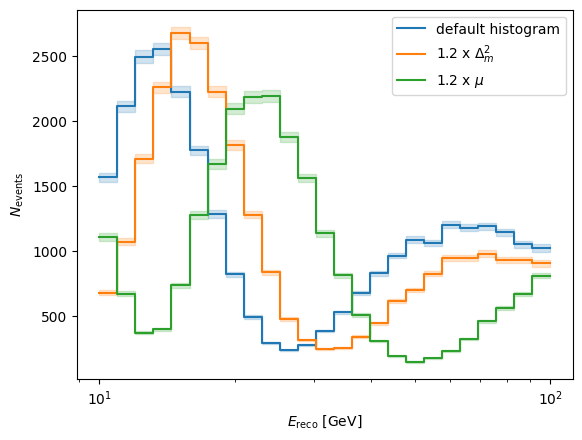

In [13]:
from toy_mc.histogram import plot_histogram

fig, ax = plt.subplots()

plot_histogram(h0, ax=ax, label=r'default histogram')

plot_histogram(h2, ax=ax, label=r'1.2 x $\Delta_m^2$ ')

plot_histogram(h3, ax=ax, label=r'1.2 x $\mu$')


plt.xscale('log')
plt.xlabel(r'$E_{\rm reco}$ [GeV]')
plt.ylabel(r'$N_{\rm events}$')

plt.legend()

In [14]:
from sklearn import preprocessing
from sklearn.compose import make_column_transformer

In [15]:
from surfaces import calculate_knn_probs as knn_probs

In [16]:
reload(generator)
gen_nominal = generator.Generator(
    int(1e5), default_response, default_pars, name="nominal"
)
# It looks like there is a breakdown point where, if the response is *too* different,
# the whole thing doesn't work anymore.
gen_sys_1 = generator.Generator(
    int(1e5),
    generator.Response(1.1 * default_response.mu, default_response.sigma),
    default_pars,
    name="sys_01",
)
gen_sys_2 = generator.Generator(
    int(1e5),
    generator.Response(0.90 * default_response.mu, default_response.sigma),
    default_pars,
    name="sys_02",
)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [17]:
reload(knn_probs)
df_with_probs = knn_probs.calculate_knn_probs(
    gen_nominal,
    [gen_sys_1, gen_sys_2],
    variables=["true_energy", "reco_energy"],
    tilt_bias_correction=True,
    neighbors_per_class=200
)

Starting KNN evaluation on 10 chunks of data...


100%|██████████| 10/10 [00:13<00:00,  1.39s/it]


In [18]:
df_with_probs_no_tilt_corr = knn_probs.calculate_knn_probs(
    gen_nominal,
    [gen_sys_1, gen_sys_2],
    variables=["true_energy", "reco_energy"],
    tilt_bias_correction=False,
    neighbors_per_class=200
)

Starting KNN evaluation on 10 chunks of data...


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


In [19]:
df_with_probs

,true_energy,true_cos(zen),weights_pre_detector,reco_energy,weights,set,prob_nominal,prob_sys_01,prob_sys_02
0,15.359421,-1.0,0.778676,16.658319,0.778676,nominal,0.678363,0.299540,0.022098
1,3.288955,-1.0,0.959714,3.646297,0.959714,nominal,0.191253,0.808247,0.000499
2,8.062961,-1.0,0.120370,8.160160,0.120370,nominal,0.783779,0.148108,0.068114
3,8.035772,-1.0,0.130889,8.010161,0.130889,nominal,0.768255,0.121775,0.109971
4,38.951530,-1.0,0.265525,37.449274,0.265525,nominal,0.790360,0.059422,0.150218
...,...,...,...,...,...,...,...,...,...
99995,10.482301,-1.0,0.555655,12.735878,0.555655,nominal,0.216161,0.783611,0.000229
99996,19.151503,-1.0,0.287471,16.335219,0.287471,nominal,0.447413,0.012236,0.540351
99997,2.437564,-1.0,0.328732,2.622619,0.328732,nominal,0.246719,0.748373,0.004907
99998,8.134756,-1.0,0.095088,8.592097,0.095088,nominal,0.720300,0.255498,0.024202


In [20]:
from toy_mc.histogram import Histogram

In [21]:
weighted_hist = Histogram(bin_edges)
weighted_hist.fill(
    df_with_probs["reco_energy"],
    df_with_probs["weights"]
    * df_with_probs["prob_sys_01"]
    / df_with_probs["prob_nominal"],
)

weighted_hist_no_tilt_corr = Histogram(bin_edges)
weighted_hist_no_tilt_corr.fill(
    df_with_probs_no_tilt_corr["reco_energy"],
    df_with_probs_no_tilt_corr["weights"]
    * df_with_probs_no_tilt_corr["prob_sys_01"]
    / df_with_probs_no_tilt_corr["prob_nominal"],
)

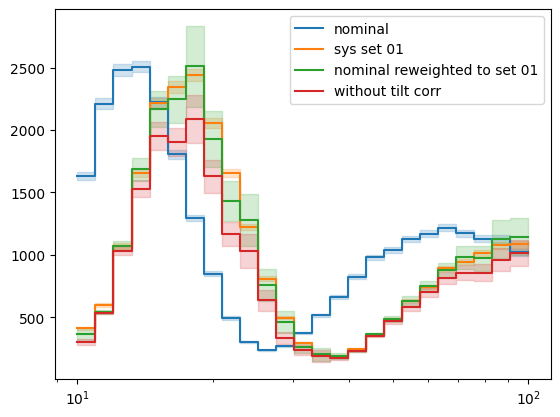

In [22]:
from toy_mc.histogram import plot_histogram

fig, ax = plt.subplots()

sys_hist = gen_sys_1.get_histogram(bin_edges)
nominal_hist = gen_nominal.get_histogram(bin_edges)

plot_histogram(nominal_hist, ax=ax, label="nominal")
plot_histogram(sys_hist, ax=ax, label="sys set 01")
plot_histogram(weighted_hist, ax=ax, label="nominal reweighted to set 01")
plot_histogram(weighted_hist_no_tilt_corr, ax=ax, label="without tilt corr")
plt.semilogx()
plt.legend()
plt.show()

In [38]:
from surfaces import calculate_grads
reload(calculate_grads)

<module 'surfaces.calculate_grads' from '/Users/trettin/Documents/ultrasurfaces/surfaces/calculate_grads.py'>

In [62]:
# get gradient names for systematic "mu"
grad_names = calculate_grads.make_gradient_names(["mu"], 2)
grad_names

['grad__mu', 'grad__mu__mu']

In [63]:
# make delta_p matrix for the systematic "mu" 
# (i.e. the detector response)
delta_p = calculate_grads.make_delta_p_from_grad_names(
    grad_names, [gen_sys_1, gen_sys_2], gen_nominal
)
delta_p

array([[ 0.  ,  0.1 , -0.1 ],
       [ 0.  ,  0.01,  0.01]])

In [64]:
# reload(calculate_grads)
df_with_grads = calculate_grads.fit_gradients(
    df_with_probs, prob_columns=["prob_nominal", "prob_sys_01", "prob_sys_02"], delta_p=delta_p, grad_names=grad_names
)

100%|██████████| 100000/100000 [00:52<00:00, 1891.11it/s]


In [65]:
df_with_grads

,true_energy,true_cos(zen),weights_pre_detector,reco_energy,weights,set,prob_nominal,prob_sys_01,prob_sys_02,grad__mu,grad__mu__mu
0,15.359421,-1.0,0.778676,16.658319,0.778676,nominal,0.678363,0.299540,0.022098,13.039702,-212.127942
1,3.288955,-1.0,0.959714,3.646297,0.959714,nominal,0.191253,0.808247,0.000499,36.908142,-224.975443
2,8.062961,-1.0,0.120370,8.160160,0.120370,nominal,0.783779,0.148108,0.068114,3.885177,-205.450525
3,8.035772,-1.0,0.130889,8.010161,0.130889,nominal,0.768255,0.121775,0.109971,0.508633,-189.235648
4,38.951530,-1.0,0.265525,37.449274,0.265525,nominal,0.790360,0.059422,0.150218,-4.638560,-212.364197
...,...,...,...,...,...,...,...,...,...,...,...
99995,10.482301,-1.0,0.555655,12.735878,0.555655,nominal,0.216161,0.783611,0.000229,40.347945,-274.731091
99996,19.151503,-1.0,0.287471,16.335219,0.287471,nominal,0.447413,0.012236,0.540351,-18.942150,-170.524603
99997,2.437564,-1.0,0.328732,2.622619,0.328732,nominal,0.246719,0.748373,0.004907,25.125697,-140.306942
99998,8.134756,-1.0,0.095088,8.592097,0.095088,nominal,0.720300,0.255498,0.024202,11.780463,-221.457125


In [60]:
# generate a histogram by weighting the nominal events to any detector response using the gradients in the dataframe
def generate_histogram_at_response(df, nominal_response, response, bin_edges, use_systs=None):
    """Generate a histogram at a given detector response.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing the events and gradients
    nominal_response : toy_mc.generator.Response
        Nominal detector response
    response : toy_mc.generator.Response
        Detector response to weight the events to
    bin_edges : np.ndarray
        Bin edges for the histogram
    use_systs : list of str, optional
        List of systematic names to use. If None, all systematics are used.
    """
    if use_systs is None:
        grad_names = df.columns[df.columns.str.startswith("grad__")]
    else:
        grad_names = ["grad_{}".format(syst) for syst in use_systs]
    delta_p = np.ones(len(grad_names))
    for i, grad_name in enumerate(grad_names):
        for param in grad_name.split("grad")[-1].split("__")[1:]:
            delta_p[i] *= getattr(response, param) - getattr(nominal_response, param)
    print(delta_p)
    weights = df["weights"] * np.exp(np.dot(df[grad_names], delta_p))
    hist = Histogram(bin_edges)
    hist.fill(df["reco_energy"], weights)
    return hist

[0.1  0.01]


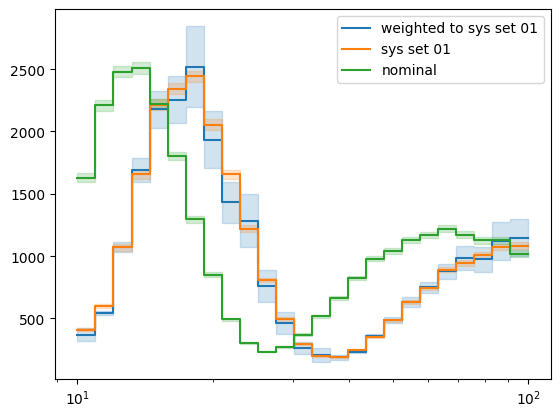

In [66]:
# generate a histogram at the response of sys set 01 using gradients

hist_at_sys_01 = generate_histogram_at_response( df_with_grads, default_response, gen_sys_1.detector_response, bin_edges)
sys_hist = gen_sys_1.get_histogram(bin_edges)
nominal_hist = gen_nominal.get_histogram(bin_edges)

# plot the histograms
fig, ax = plt.subplots()
plot_histogram(hist_at_sys_01, ax=ax, label="weighted to sys set 01")
plot_histogram(sys_hist, ax=ax, label="sys set 01")
plot_histogram(nominal_hist, ax=ax, label="nominal")
plt.semilogx()
plt.legend()
plt.show()